#### 1. Вопросы


1) Оцениваю свой уровень владения Python на 7/10. В принципе, имею неплохое понимание базы Python. Понимаю, принципы ООП, умею работать с классами. Так же имею большой опыт работы с Python в сфере анализа данных. Владею основными релевантными библиотеками, такими как pandas, matplotlib, seaborn, numpy, scikit-learn.

2) Оцениваю свой уровень владения Google Sheets на 6/10. Умею использовать встроенные функции, создавать сводные таблицы.

#### 2. Задачи на логику

1) Рекламная кампания стартовала вчера с дневным бюджетом 40 $. Половина
бюджета была израсходована к полудню, а 80% оставшегося бюджета было
потрачено между полуднем и временем закрытия. Сколько долларов не было
потрачено?

In [1]:
40 * 0.5 * 0.2

4.0

Ответ: 4 доллара

2) 5 идентичных рекламных кампаний работали 24 дня по 6 часов в день,
потрачено было 120 долларов. Сколько дней они работали бы на 216 долларов,
если бы 9 одинаковых кампаний работали бы по 8 часов в день?

In [2]:
216 / (120 / (24 * 6 * 5) * 9 * 8)

18.0

Ответ: 18 дней

3) Дизайнеры создали 200 рекламных баннеров для двух рекламных кампаний. 80
из них не использовались ни в кампании No1, ни в кампании No2, 60
использовались только в кампании No1. И для каждого рекламного баннера,
который использовался в обеих кампаниях, приходится 3 баннера, которые
использовались только в кампании No2. Сколько баннеров было использовано в
обеих рекламных кампаниях?

In [3]:
(200 - 80 - 60) / 4

15.0

Ответ: 15 баннеров

4) Энн использует Instagram, но не Facebook, а Джон использует Youtube и
Facebook. Кейт использует Youtube, но не Instagram, а Том использует Facebook,
но не Youtube. Если каждый человек использует две из трех социальных сетей,
у кого предпочтения совпадают?

Энн: Instagram, Youtube
Джон: Youtube, Facebook
Кейт: Youtube, Facebook
Том: Facebook, Instagram

Ответ: Джон и Кейт

5) Средний итоговый балл стажера по 4 модулям составляет 78 баллов. Сколько
баллов должен получить стажер за 5-й модуль, чтобы средний балл по всему
заданию составил 80?

In [4]:
80 * 5 - 78 * 4

88

Ответ: 88 баллов

6) Заказанные в приложении товары доставляются на автомобиле. Автомобиль
проезжает 260 км со средней скоростью 80 км / ч. На обратном пути машина
движется со средней скоростью 100 км / ч. Насколько быстрее был обратный
путь? Ответ указать в минутах.

Время пути в прямом направлении:

In [5]:
260 / 80 * 60

195.0

Время пути в обратном направлении:

In [6]:
260 / 100 * 60

156.0

In [7]:
195 - 156

39

Ответ: 39 минут

#### 3. Техническое задание

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 6

In [9]:
data = pd.read_excel(r'C:\Users\Azichka\Desktop\TZ\data.xlsx', usecols = ['client_id', 'sum', 'status', 'sale', 'new/current', 'document', 'receiving_date'])

In [10]:
data.head(10)

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00
7,21.0,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13 00:00:00
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-08 00:00:00
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-06-23 00:00:00


In [11]:
data['status'].value_counts()

status
ОПЛАЧЕНО         622
ПРОСРОЧЕНО        52
В РАБОТЕ          44
НА ПОДПИСАНИИ      5
Май 2021           1
ВНУТРЕННИЙ         1
Июнь 2021          1
Июль 2021          1
Август 2021        1
Сентябрь 2021      1
Октябрь 2021       1
Name: count, dtype: int64

In [12]:
data['dates'] = data['status'].apply(lambda x: x if x not in ('ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'В РАБОТЕ', 'НА ПОДПИСАНИИ', 'ВНУТРЕННИЙ') else None)

data['dates'].ffill(inplace = True)

In [13]:
data = data.query('status in ("ОПЛАЧЕНО", "ПРОСРОЧЕНО", "В РАБОТЕ", "НА ПОДПИСАНИИ")')

In [14]:
data['new/current'].value_counts()

new/current
текущая    620
новая      103
Name: count, dtype: int64

In [15]:
data['document'].value_counts()

document
оригинал    595
НЕТ         113
Name: count, dtype: int64

1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

In [16]:
print('Общая выручка за июль 2021 равна', data.query('dates == "Июль 2021" and status != "ПРОСРОЧЕНО"')['sum'].sum())

Общая выручка за июль 2021 равна 859896.4699999997


2) Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.

In [17]:
def month_to_number(string):
    dict = {'Май 2021': 5, 'Июнь 2021': 6, 'Июль 2021': 7, 'Август 2021': 8, 'Сентябрь 2021': 9, 'Октябрь 2021': 10}
    return dict[string]

In [18]:
revenue = data.query('status != "ПРОСРОЧЕНО"').groupby('dates', as_index = False).agg(revenue = ('sum', 'sum'))

In [19]:
revenue['num'] = revenue['dates'].apply(month_to_number)

In [20]:
revenue.sort_values('num', ascending = True, inplace = True)

Распределение выручки по месяцам

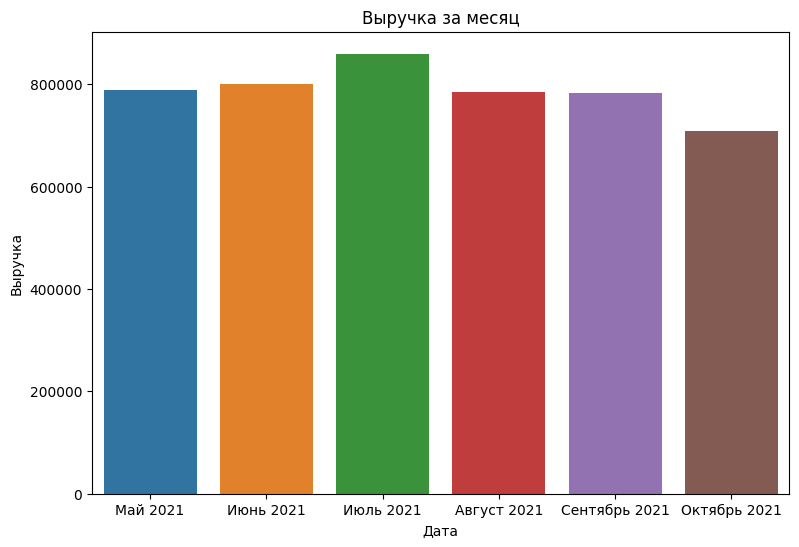

In [21]:
fig = sns.barplot(revenue, x = 'dates', y = 'revenue')
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.title("Выручка за месяц")
plt.show(fig)

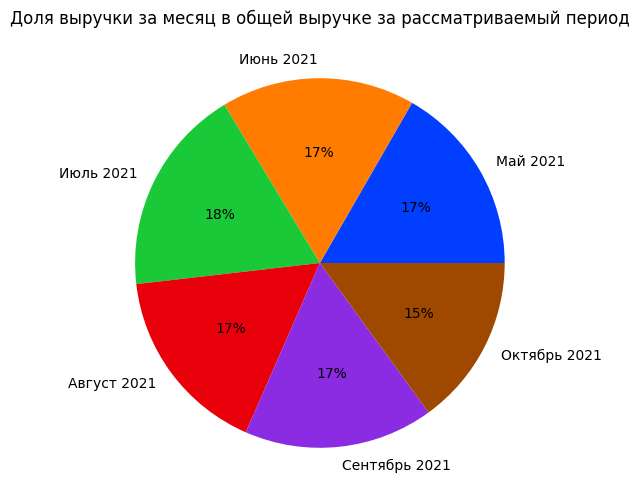

In [22]:
palette_color = sns.color_palette('bright') 
fig = plt.pie(revenue['revenue'], labels=revenue['dates'], colors=palette_color, autopct='%.0f%%') 
plt.title("Доля выручки за месяц в общей выручке за рассматриваемый период")
plt.show(fig) 

Кумулятивная сумма

In [23]:
revenue['cum_sum'] = revenue['revenue'].cumsum() / 1_000_000

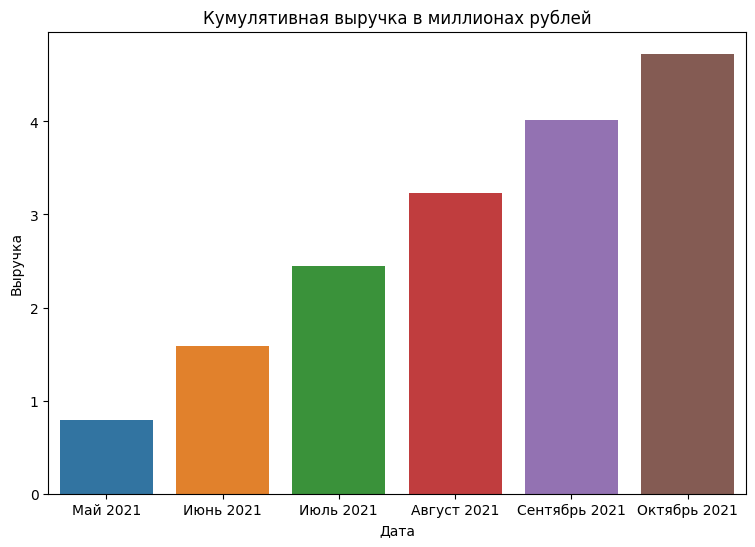

In [24]:
fig = sns.barplot(revenue, x = 'dates', y = 'cum_sum')
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.title("Кумулятивная выручка в миллионах рублей")
plt.show(fig)

3) Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [25]:
revenue_per_manager = data.query('status != "ПРОСРОЧЕНО" and dates == "Сентябрь 2021"').groupby('sale', as_index = False).agg(revenue = ('sum', 'sum')).sort_values('revenue', ascending = False)

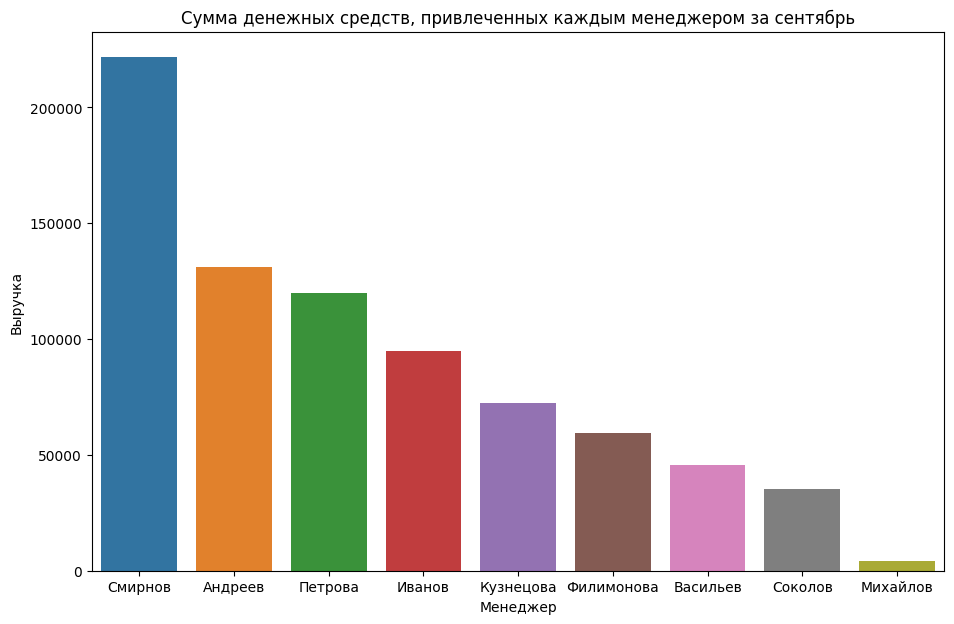

In [26]:
rcParams['figure.figsize'] = 11, 7
fig = sns.barplot(revenue_per_manager, x = 'sale', y = 'revenue')
plt.xlabel("Менеджер")
plt.ylabel("Выручка")
plt.title("Сумма денежных средств, привлеченных каждым менеджером за сентябрь")
plt.show(fig)

#### Больше всех привлек Смирнов

4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [27]:
data.query('dates == "Октябрь 2021"')['new/current'].value_counts()

new/current
текущая    99
новая      36
Name: count, dtype: int64

Текущая - 99, новая - 36. Преобладает текущая

5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [28]:
print('Количество оригиналов договоров по майским сделкам, полученных в июне 2021:', data[(data['receiving_date'].astype('datetime64[ns]').dt.month == 6) & (data['dates'] == 'Май 2021') & (data['document'] == 'оригинал')].shape[0])

Количество оригиналов договоров по майским сделкам, полученных в июне 2021: 76


### Задача

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

#### Если я правильно понял условие задачи, необходимо найти менеджеров, которые заключили сделки до июля и при этом получили оригиналы договора в июле или позже, или еще не получили. Также нужно отфильтровать те сделки, где оплата просрочена

In [29]:
temp = data[(data['receiving_date'].astype('datetime64[ns]').dt.strftime('%Y-%m-%d') >= '2021-07-01') & ( (data['dates'] == 'Май 2021') | (data['dates'] == 'Июнь 2021') )  & (data['status'] != 'ПРОСРОЧЕНО')]

In [30]:
temp['residue'] = temp.apply(lambda x: x['sum'] * 0.07 if x['status'] == 'ОПЛАЧЕНО' and x['new/current'] == 'новая' else ( x['sum'] * 0.05 if x['new/current'] == 'текущая' and x['sum'] > 10000 else ( x['sum'] * 0.03 if x['new/current'] == 'текущая' and x['sum'] <= 10000 else 0)), axis = 1)

C:\Users\Azichka\AppData\Local\Temp\ipykernel_21240\4122384129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['residue'] = temp.apply(lambda x: x['sum'] * 0.07 if x['status'] == 'ОПЛАЧЕНО' and x['new/current'] == 'новая' else ( x['sum'] * 0.05 if x['new/current'] == 'текущая' and x['sum'] > 10000 else ( x['sum'] * 0.03 if x['new/current'] == 'текущая' and x['sum'] <= 10000 else 0)), axis = 1)


#### Таблица со значениями остатков

In [31]:
temp.groupby('sale', as_index = False).agg(residue = ('residue', 'sum')).sort_values('residue', ascending = False)

,sale,residue
4,Петрова,10770.7474
6,Смирнов,7401.8220
2,Иванов,5991.4520
5,Селиванов,5297.6900
3,Кузнецова,4496.9501
0,Андреев,3954.7907
8,Филимонова,2317.9579
1,Васильев,1037.0490
7,Соколов,269.2110
